<a href="https://colab.research.google.com/github/SunRani/IDS/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rani Son**

## **A Statistical Analysis on Factors Influencing Life Expectancy In Countries Around the World**

### ***Part 1: SQL***

### *Before I start Cleansing, I obtained the data from the Global Health Oberservatory that keeps track of of the health Status and many other realted factors related to Life Expectancy*

### **Data Cleansing**

### First, I deleted all Rows that had population 0 or null. I reasoned this beacuse if we do not know the population of a given then giving it different data might change the data in a way that gives us skewed results.

### **Countries Before Delete**

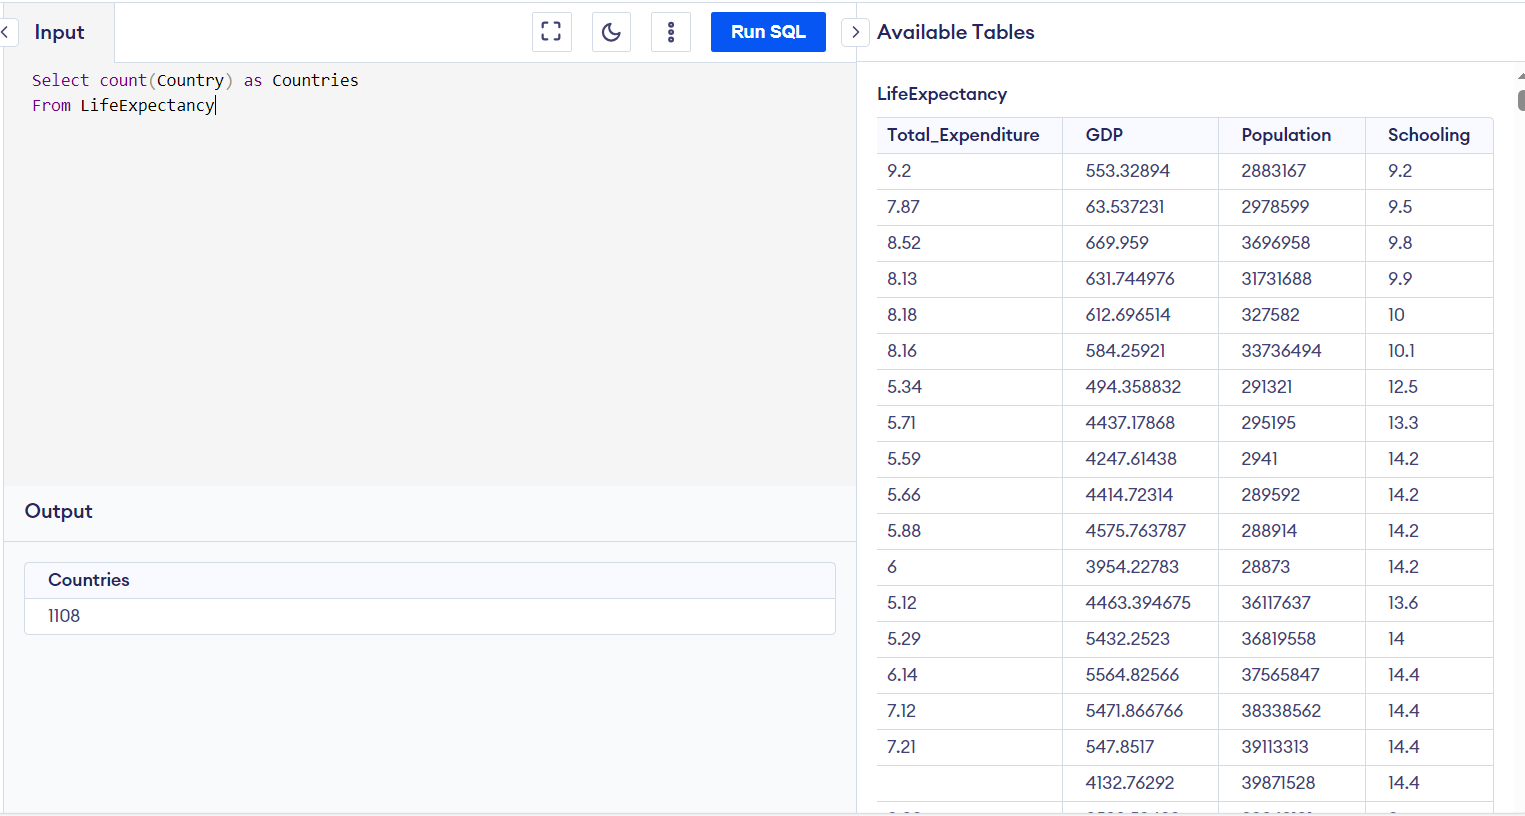

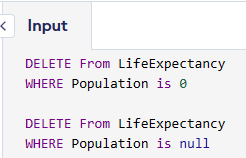

### **Countries After Delete**

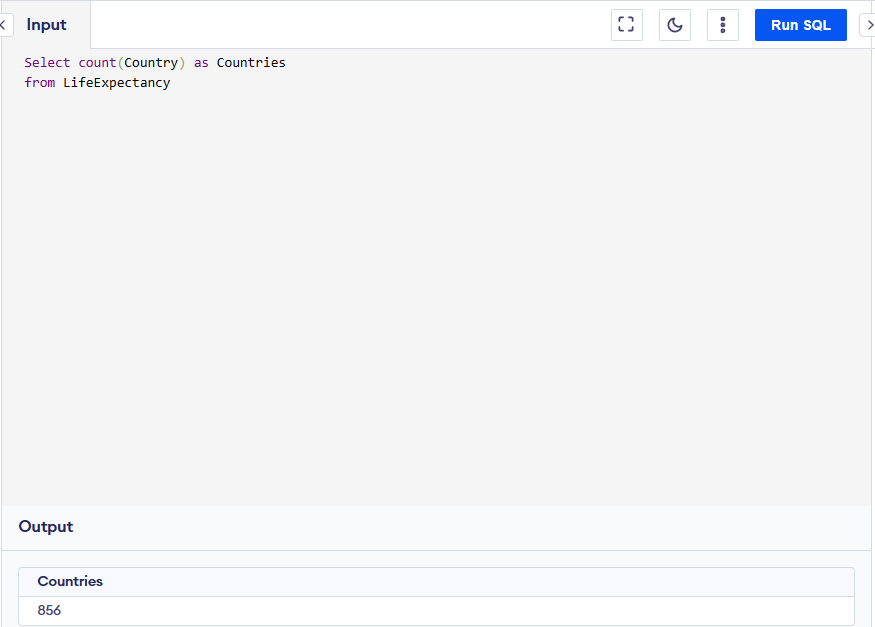

### **Update**
### After deleteing the rows where population is 0/null, I attempted and corrected any noisy data. Then I updated all the columns that had 0 or null.

### *Finding Noisy Data*

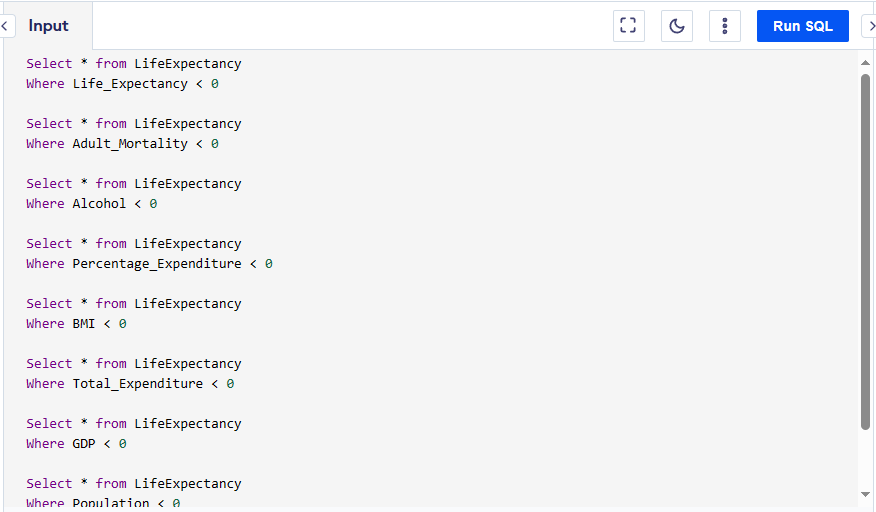

### *Updating Data*

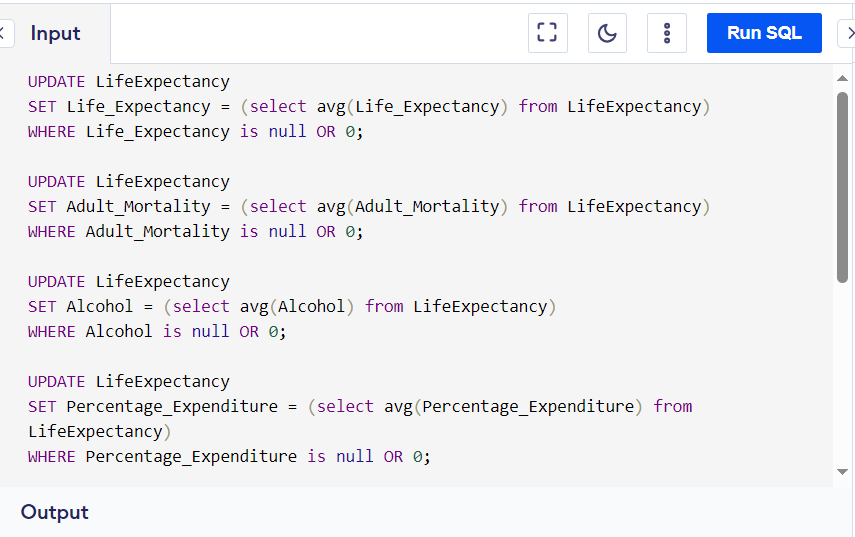
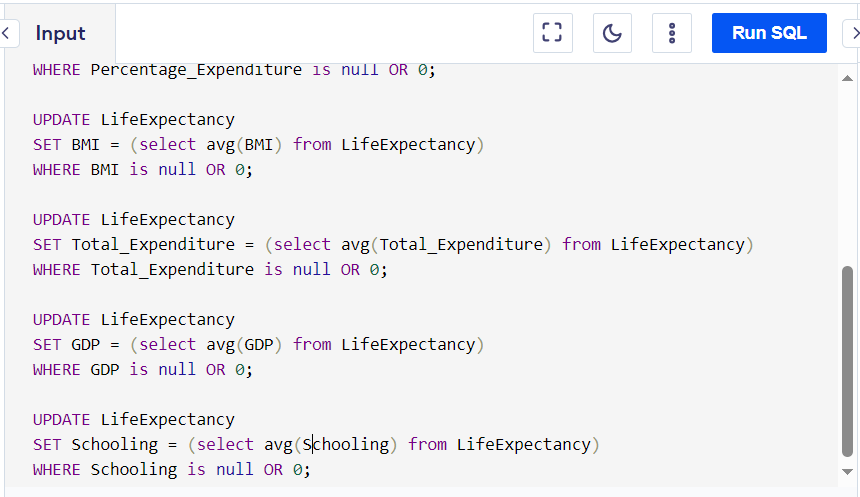

### **Finding Highest and Lowest Averages of Data**
### After Cleansing the Data I can now proceed to extract Data Analysis

### **Highest And Lowest Average Mortality Rates Per 1000 Population(2010-2015)**
### Highest - Lesotho: 436
### Lowest - Tunisia: 11 (Rounded)

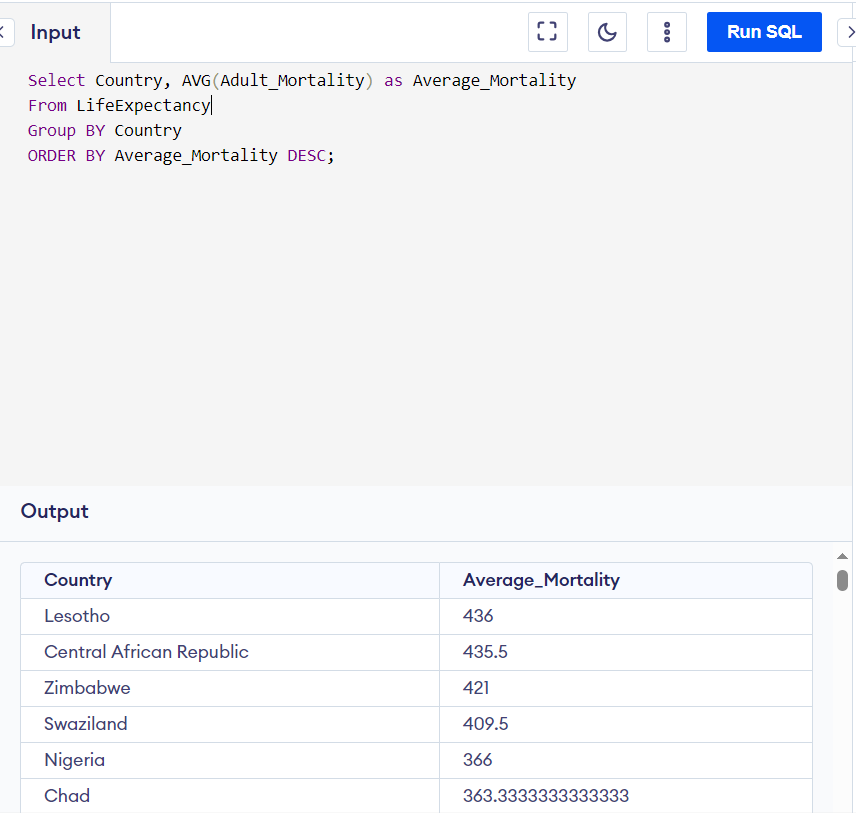
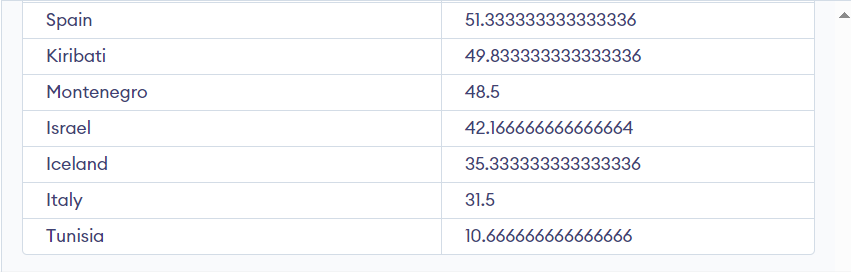

### **Highest And Lowest Average Population (2010-2015)**
### Highest - India: 281,099,849
### Lowest - Palau: 292

### This seemed very strange to me and I even checked to see what the population of Palau was around this interval, so I think it may have been entered incorrectly.

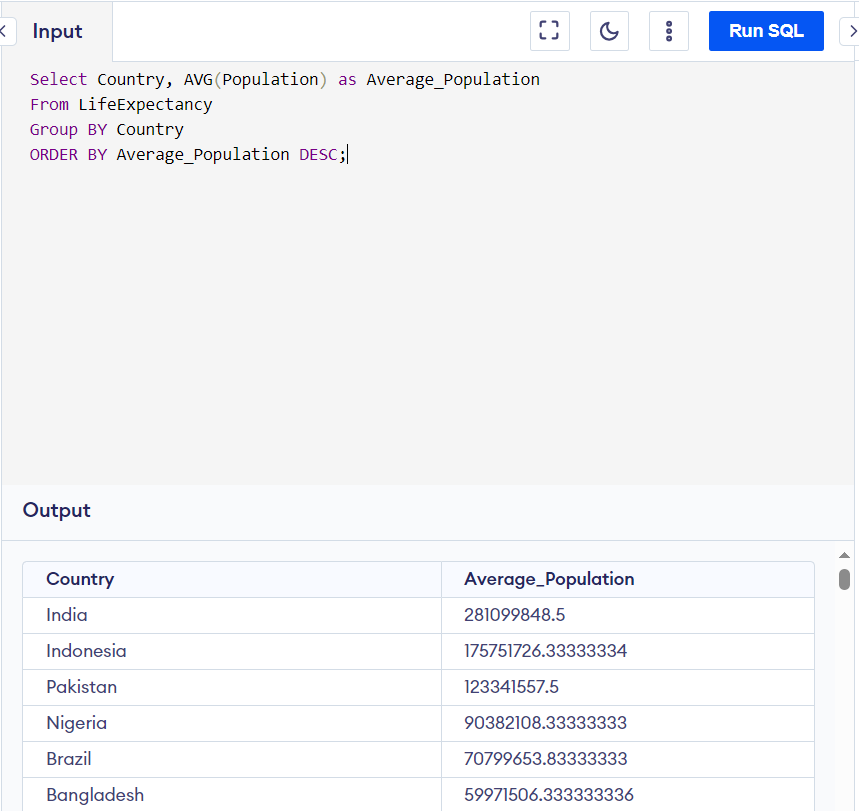
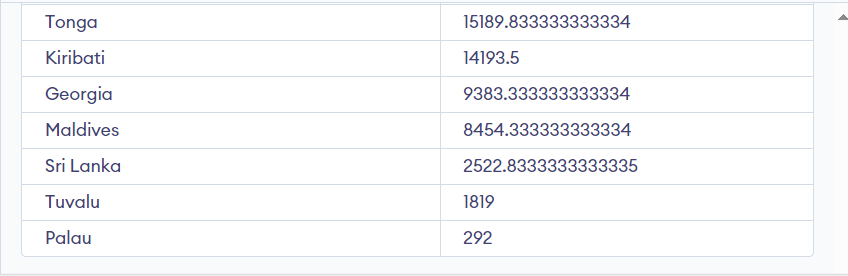

### **Highest And Lowest Average GDP in USD$ (2010-2015)**
### Highest - Switzerland: 70,817
### Lowest - Senegal: 94 (Rounded)

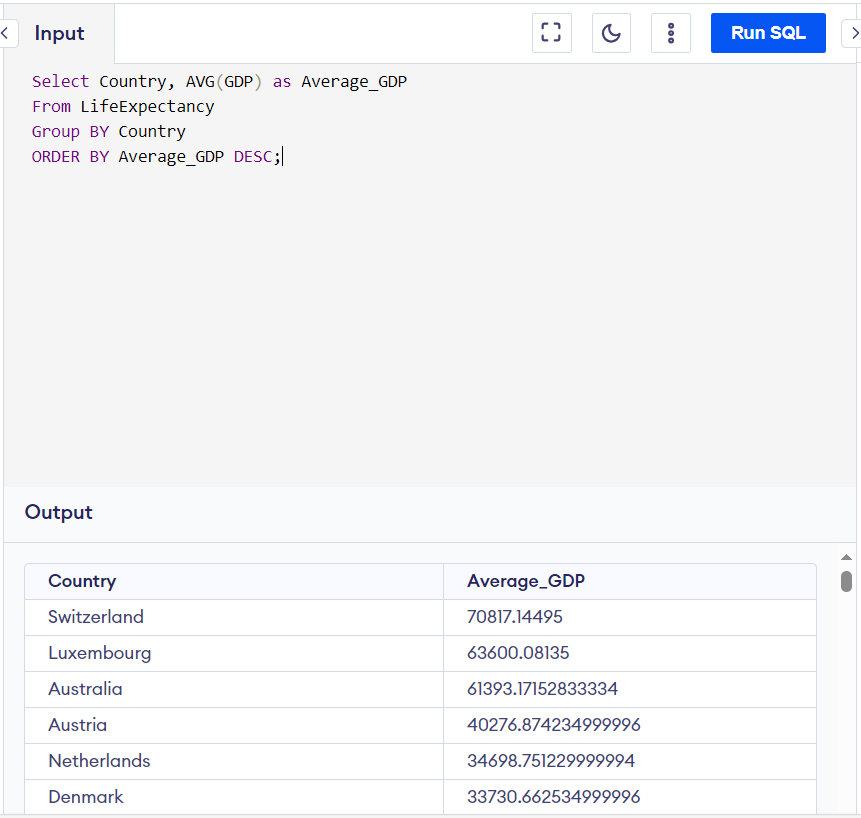
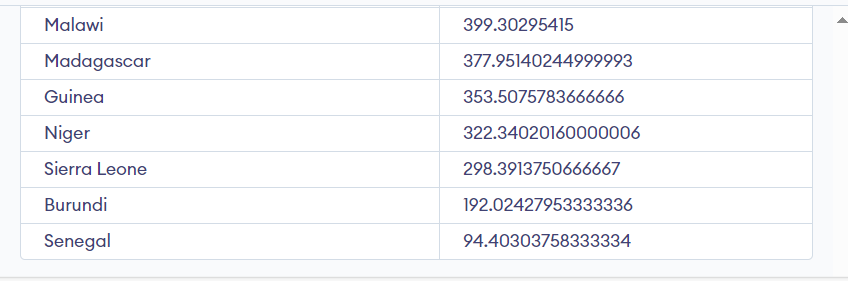

### **Highest And Lowest Average Schooling, Number of Years of Schooling (2010-2015)**
### Highest - Australia: 20
### Lowest - Eritrea: 5 (Rounded)

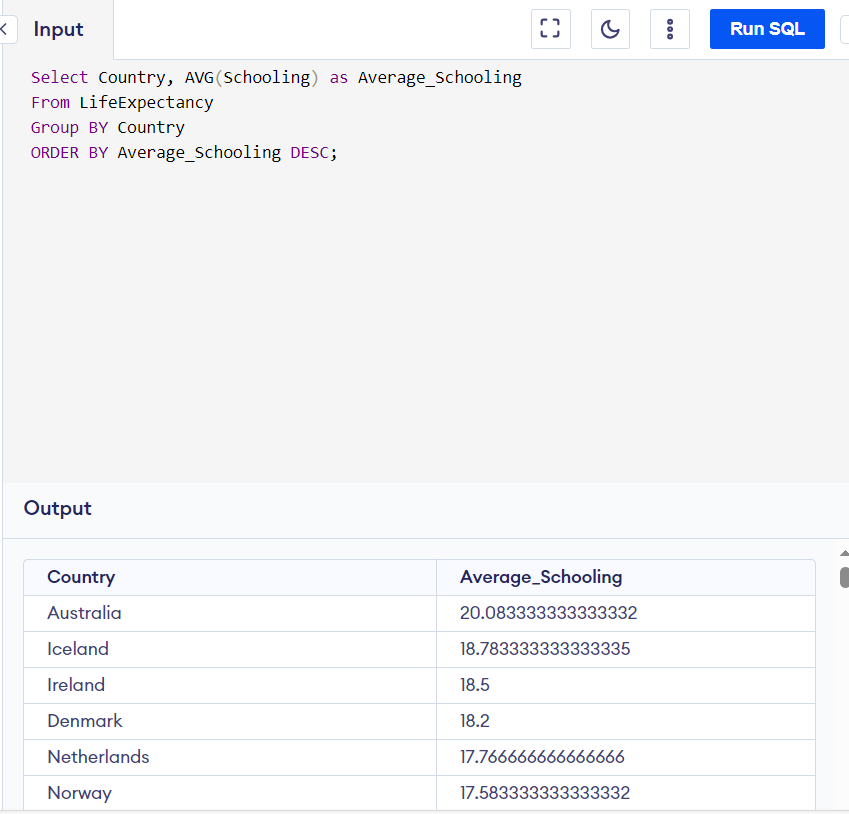
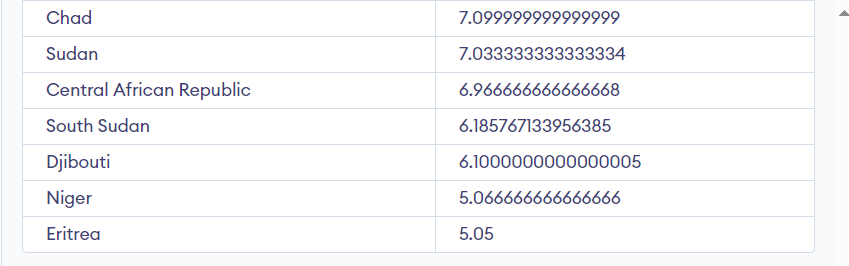

### **Highest And Lowest Average Alcohol Consumption (Litres of Pure Alcohol) (2010-2015)**
### Highest - Belarus: 436
### Lowest - Afghanistan: 11 (Rounded)

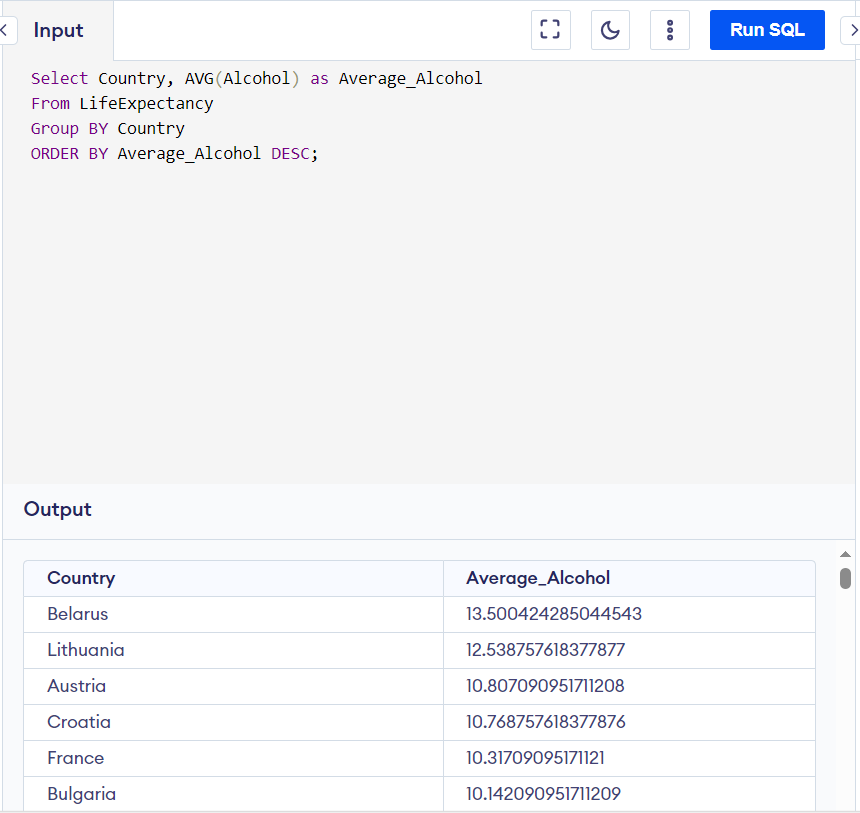
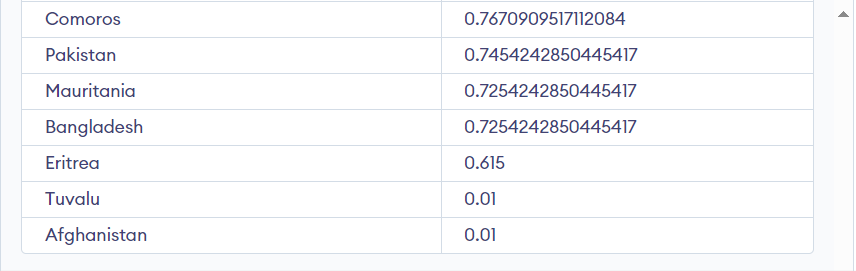

### **Do densely populated countries tend to have lower life expectancy?**

### **After having cleansed and processed the data, we can attempt to answer this question. From what I can see from the table, I would conclude that densely populated countries do tend to have lower life expectancy. In part 2 of the project, I will try to find out more about the relationship Life Expectancy has with other factors that can influence it being higher or lower.**

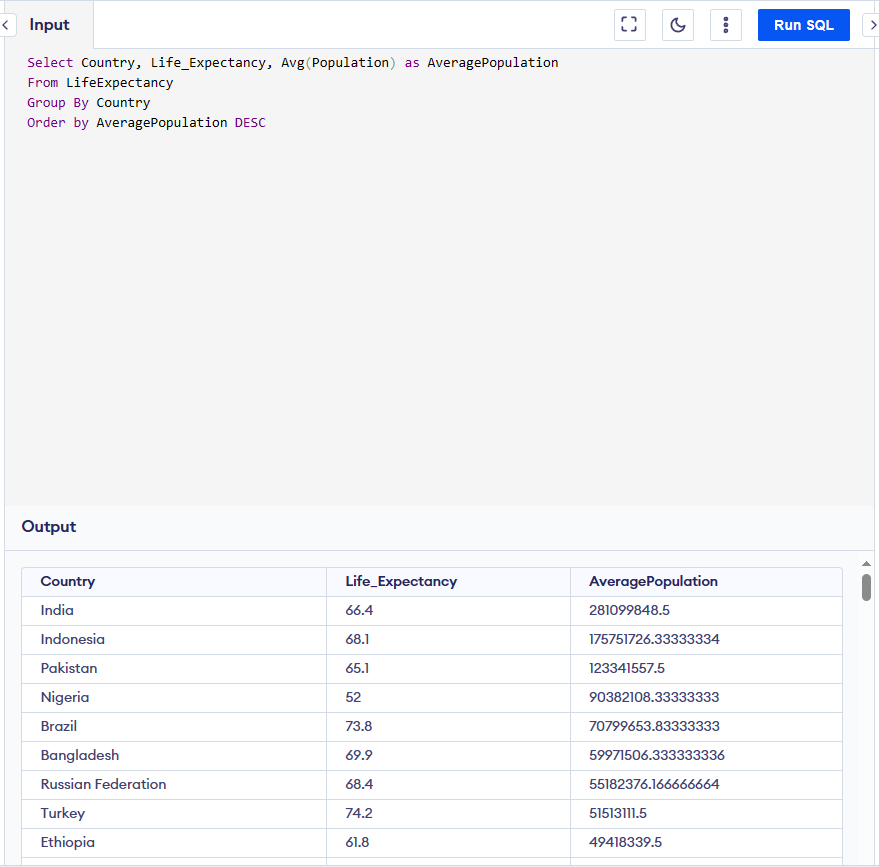
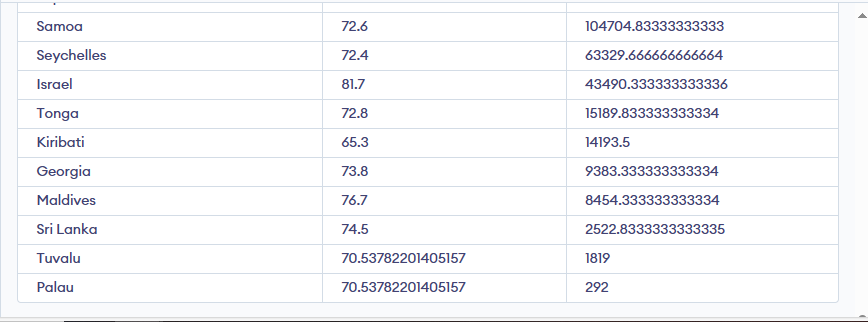

### ***Part 2: Python***

### **At the top I just want to import most of the libraries I plan to use in this portion.**

In [233]:
import pandas as pd

In [234]:
import numpy as np
import matplotlib.pyplot as plt

In [235]:
from tabulate import tabulate

In [236]:
from scipy.stats import pearsonr

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW3/Life_Expectancy.csv"
df = pd.read_csv(url, sep=",")

### **Here I use the pandas data frame to craete a pretty representation of the dataset from Part 1.**

In [239]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒══════╤══════════════════════════════════════════════════════╤════════╤════════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═════════╤═════════════════════╤══════════════╤══════════════════╤═════════════╕
│      │ Country                                              │   Year │   Life_Expectancy  │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │    BMI  │   Total_Expenditure │          GDP │       Population │   Schooling │
╞══════╪══════════════════════════════════════════════════════╪════════╪════════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═════════╪═════════════════════╪══════════════╪══════════════════╪═════════════╡
│    0 │ Afghanistan                                          │   2010 │               58.8 │               279 │      0.01 │                79.6794   │    16.7 │                9.2  │    553.329   │      2.88317e+06 │         9.2 │
├──────┼──────────────────────────────────────────────────────┼─────

### **Like in Part 1, I am doing the same cleansing techniques, but in python.**

In [240]:
df.dropna(subset=['Population'])

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1103,Zimbabwe,2011,54.9,464.0,6.00,63.750530,29.9,6.31,839.927936,14386649.0,10.1
1104,Zimbabwe,2012,56.6,429.0,6.09,92.602336,3.3,6.69,955.648466,1471826.0,9.8
1105,Zimbabwe,2013,58.0,399.0,6.39,10.666707,3.8,6.88,111.227396,155456.0,10.4
1106,Zimbabwe,2014,59.2,371.0,6.50,10.822595,31.3,6.44,127.474620,15411675.0,10.3


### **Cleaning Population**

In [241]:
df['Population'] = df['Population'].fillna(df['Population'].mean())

In [242]:
df['Population'] = df['Population'].replace(0, df['Population'].mean())

### **Cleaning Life Expectancy**

In [243]:
df['Life_Expectancy '] = df['Life_Expectancy '].fillna(df['Life_Expectancy '].mean())

In [244]:
df['Life_Expectancy '] = df['Life_Expectancy '].replace(0, df['Life_Expectancy '].mean())

### **Cleaning Adult Mortality**

In [245]:
df['Adult_Mortality'] = df['Adult_Mortality'].fillna(df['Adult_Mortality'].mean())

In [246]:
df['Adult_Mortality'] = df['Adult_Mortality'].replace(0, df['Adult_Mortality'].mean())

### **Cleaning Alcohol**

In [247]:
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())

In [248]:
df['Alcohol'] = df['Alcohol'].replace(0, df['Alcohol'].mean())

### **Cleaning Percentage Expenditure**

In [249]:
df['Percentage_Expenditure'] = df['Percentage_Expenditure'].fillna(df['Percentage_Expenditure'].mean())

In [250]:
df['Percentage_Expenditure'] = df['Percentage_Expenditure'].replace(0, df['Percentage_Expenditure'].mean())

### **Cleaning BMI**

In [251]:
df[' BMI '] = df[' BMI '].fillna(df[' BMI '].mode())

In [252]:
df[' BMI '] = df[' BMI '].replace(0, df[' BMI '].mean())

### **Cleaning Total Expenditure**

In [253]:
df['Total_Expenditure'] = df['Total_Expenditure'].fillna(df['Total_Expenditure'].mean())

In [254]:
df['Total_Expenditure'] = df['Total_Expenditure'].replace(0, df['Total_Expenditure'].mean())

### **Cleaning GDP**

In [255]:
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())

In [256]:
df['GDP'] = df['GDP'].replace(0, df['GDP'].mean())

### **Cleaning Schooling**

In [257]:
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [258]:
df['Schooling'] = df['Schooling'].replace(0, df['Schooling'].mean())

### **Showing Table Again after data Cleansing**

In [259]:
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒══════╤══════════════════════════════════════════════════════╤════════╤════════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═════════╤═════════════════════╤══════════════╤══════════════════╤═════════════╕
│      │ Country                                              │   Year │   Life_Expectancy  │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │    BMI  │   Total_Expenditure │          GDP │       Population │   Schooling │
╞══════╪══════════════════════════════════════════════════════╪════════╪════════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═════════╪═════════════════════╪══════════════╪══════════════════╪═════════════╡
│    0 │ Afghanistan                                          │   2010 │            58.8    │           279     │   0.01    │                79.6794   │    16.7 │             9.2     │    553.329   │      2.88317e+06 │      9.2    │
├──────┼──────────────────────────────────────────────────────┼─────

### **Correlation Analysis**

### Here I will prepare the data for Analysis

In [260]:
LifeExpectancy = df['Life_Expectancy ']

In [261]:
AdultMortality = df['Adult_Mortality']

In [262]:
Alcohol = df['Alcohol']

In [263]:
PercentageExpenditure = df['Percentage_Expenditure']

In [264]:
BMI = df[' BMI ']

In [265]:
TotalExpenditure = df['Total_Expenditure']

In [266]:
GDP = df['GDP']

In [267]:
Population = df['Population']

In [268]:
Schooling = df['Schooling']

### **How does Adult Mortality rates affect Life Expectancy?**

In [269]:
corr, _ = pearsonr(LifeExpectancy, AdultMortality)
print('Perarsons correlation: %.5f' % corr)

Perarsons correlation: -0.75772


### From this we can see that Adult Mortality and Life Expectancy have a strong negative correlation. In other words, it tells us that as Life Expectancy increases then Adult Mortality ddecreases and vice versa.

### **Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?**

### For Eating habits and Social Behaviors I was not exactly sure which field so use, but I choose Percentage Expenditure and Total Expenditure respectively.

In [270]:
corr, _ = pearsonr(LifeExpectancy, Alcohol)
print('Perarsons correlation: %.5f' % corr)

Perarsons correlation: 0.41681


### Life Expectancy and Alcohol have a positive, but normal correlation. I think it makes sense that the correlation is not too high because I would expect that the more alcohol a country consumes the more health issues could affect Life Expectancy.

In [271]:
corr, _ = pearsonr(LifeExpectancy, PercentageExpenditure)
print('Perarsons correlation: %.5f' % corr)

Perarsons correlation: 0.37013


### Life Expectancy and and Percentage Expenditure have a positive, but weak Correlation. I expected the correlation to be higher because I assumed that the more a country's individuals spend on health then that would directly correlate to higher life expectancy

In [272]:
corr, _ = pearsonr(LifeExpectancy, TotalExpenditure)
print('Perarsons correlation: %.5f' % corr)

Perarsons correlation: 0.21846


### Life Expectancy and and Percentage Expenditure have a positive, but weak Correlation. This is the weakest correlation I have seen to far, and like percentage expenditure I asssumed it to be much higher for the same reasons.

In [273]:
corr, _ = pearsonr(LifeExpectancy, GDP)
print('Perarsons correlation: %.5f' % corr)

Perarsons correlation: 0.43146


### Life Expectancy and and Percentage Expenditure have a positive, but normal Correlation. This correlation sounds right as I would expect that if GDP of a country rises then so would life expectancy.

### **What is the impact of schooling on the lifespan of humans?**

In [274]:
corr, _ = pearsonr(LifeExpectancy, Schooling)
print('Perarsons correlation: %.5f' % corr)

Perarsons correlation: 0.75781


### Life Expectancy and and Schooling have a positive, and strong correlation. Like the other correlations found, I definitely agree with this as I would expect that a positive increase in school attendence should correlate to a increase in life expectancy beacuse more better education allows for better opportunitites.

### **Here this shows the Pearsonr values for the whole table**

In [275]:
df.corr()

<ipython-input-275-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.060949,-0.030889,-0.107807,-0.018718,0.062230,0.021077,-0.007181,0.020505,0.048951
Life_Expectancy,0.060949,1.000000,-0.757724,0.416810,0.370127,0.512561,0.218464,0.431461,-0.030389,0.757809
Adult_Mortality,-0.030889,-0.757724,1.000000,-0.209310,-0.232794,-0.390479,-0.121481,-0.291784,0.022213,-0.540350
Alcohol,-0.107807,0.416810,-0.209310,1.000000,0.328591,0.250127,0.291358,0.293192,-0.027052,0.485382
Percentage_Expenditure,-0.018718,0.370127,-0.232794,0.328591,1.000000,0.194707,0.214005,0.858895,-0.030648,0.374279
BMI,0.062230,0.512561,-0.390479,0.250127,0.194707,1.000000,0.198327,0.248381,-0.065193,0.479809
Total_Expenditure,0.021077,0.218464,-0.121481,0.291358,0.214005,0.198327,1.000000,0.136624,-0.061807,0.218424
GDP,-0.007181,0.431461,-0.291784,0.293192,0.858895,0.248381,0.136624,1.000000,-0.025715,0.430828
Population,0.020505,-0.030389,0.022213,-0.027052,-0.030648,-0.065193,-0.061807,-0.025715,1.000000,-0.044867
Schooling,0.048951,0.757809,-0.540350,0.485382,0.374279,0.479809,0.218424,0.430828,-0.044867,1.000000


### **Liner Regression Models (Life Expectancy)**

### First, I wanted to verify I was using the Linear Regression Library correctly.

In [276]:
LRgraph = df

In [277]:
LRgraph.head()

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0


In [278]:
LRgraph.shape

(1108, 11)

### **I declare Y first here because Life Expectancy is the dependent Variable and that will not change.**

In [279]:
Y = LRgraph.iloc[:,2].values.reshape(-1,1)

### **The first I will compare with will be Schooling**

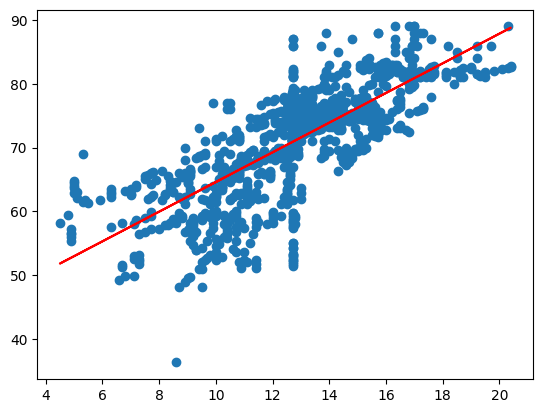

In [280]:
# X = Schooling
X = LRgraph.iloc[:,10].values.reshape(-1,1)

# Model
LRmodel = LinearRegression()

# Actually Performing Linear Regression
LRmodel.fit(X,Y)

# Predictions
Y_pred = LRmodel.predict(X)

# Lastly, Visualizing the data and regression line
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.show()

In [281]:
print("The SlopeL ", LRmodel.coef_)
print("The Intercept: ", LRmodel.intercept_)

The SlopeL  [[2.3269967]]
The Intercept:  [41.33853037]


In [282]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  31.562825064767722
R2:  0.5742746746212503


### **Next, I will compare with Adult Mortality**

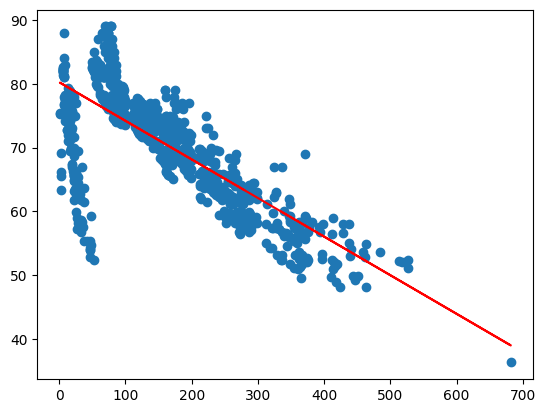

In [283]:
# X = Adult Mortality
X = LRgraph.iloc[:,3].values.reshape(-1,1)

# Model
LRmodel = LinearRegression()

# Actually Performing Linear Regression
LRmodel.fit(X,Y)

# Predictions
Y_pred = LRmodel.predict(X)

# Lastly, Visualizing the data and regression line
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.show()

In [284]:
print("The SlopeL ", LRmodel.coef_)
print("The Intercept: ", LRmodel.intercept_)

The SlopeL  [[-0.06053004]]
The Intercept:  [80.25768302]


In [285]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  31.57238363037563
R2:  0.5741457468891722


### **Lastly, I will compare with BMI**

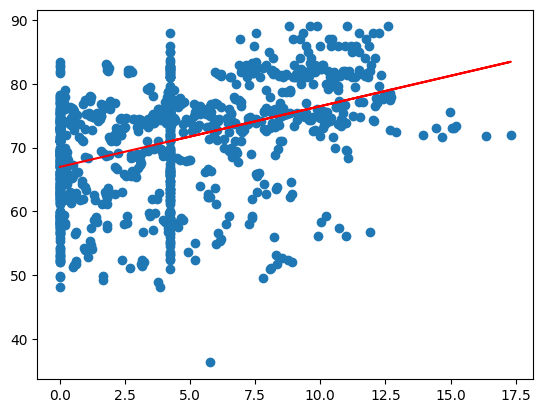

In [286]:
# X = BMI
X = LRgraph.iloc[:,4].values.reshape(-1,1)

# Model
LRmodel = LinearRegression()

# Actually Performing Linear Regression
LRmodel.fit(X,Y)

# Predictions
Y_pred = LRmodel.predict(X)

# Lastly, Visualizing the data and regression line
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.show()

In [287]:
print("The SlopeL ", LRmodel.coef_)
print("The Intercept: ", LRmodel.intercept_)

The SlopeL  [[0.95318817]]
The Intercept:  [66.96599686]


In [288]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  61.258759317654
R2:  0.17373032390823184


### ***Part 2 Conclusions***

### *My Findings*
### Before that, however, I picked these 3 because they had the highest positive correlation and beacuse I beleive that these factors have teh highest contributtion to affecting Life Expectancy




### **Life Expectancy and Schooling**
### The Model and prediction that I created came up with a MSE of 31.6 and R2 of 0.6 (both rounded up). Firstly, I would say that is a pretty good MSE value and that our predicition was very close to the actual values. The R2 value tells us that the variance of Life Expectancy have a good relationship proportionally to Schooling.

### **Life Expectancy and Adult Mortality**
### With these values I obtained a MSE of 31.6 and R2 of 0.6 (both rounded up). Again, this is a good MSE value it means that the predication was close to the actual values. The R2 value tells us that the variance of Life Expectancy have a good relationship proportionally to Adult Mortality.

### **Life Expectancy and BMI**
### For my last model, I obtained a MSE of 61.3 and a R2 of 0.2, which is a lot worse compared to the first two. The MSE is considerably worse than the other two meaning that the model predicted matches a lot less of the actual data. Compared to the other two models, the data for this is much more spread apart so it makes sense for that to be the case. Lastly, the R2 being very close to 0 tells us that Life Expectancy is much less dependant on BMI comapared to other values.

### **Final Conclusion**

### **The model that performed worse was BMI and the best model was schooling if we do not round up. Schooling gave the best model because the values in that model are positively correlation in a much higher degree than most of the other values. It shows a value that Life Expectancy is dependant on meaning that knowing Schooling can help us predict Life Expectany better.**